In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Start with the checking of less number of vertex

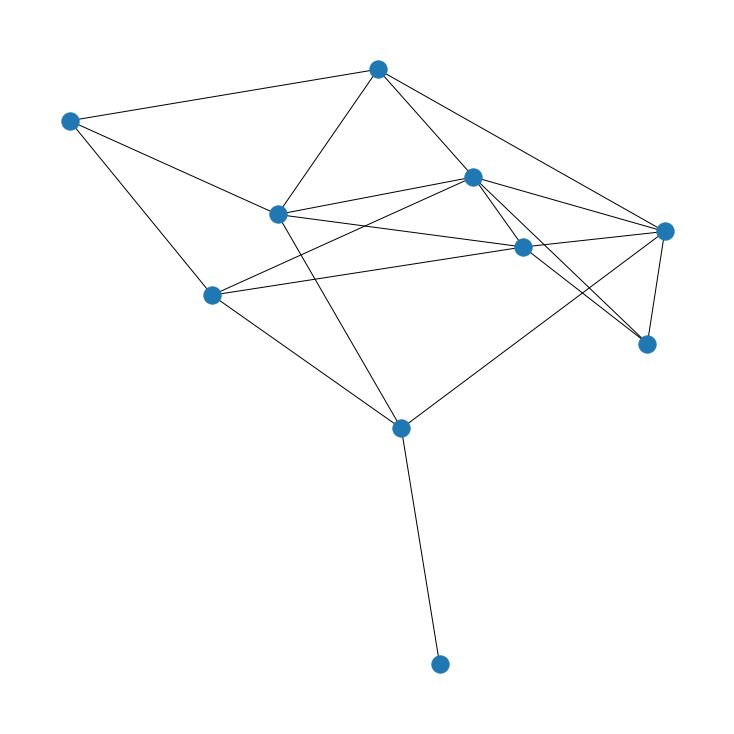

In [5]:
n = 10  # 100 nodes
m = 20  # 20 edges
seed = 2000  # seed random number generators for reproducibility

# Use seed for reproducibility
G_m = nx.gnm_random_graph(n, m, seed=seed)

pos = nx.spring_layout(G_m, seed=seed)  # Seed for reproducible layout
plt.figure(figsize=(10,10))
nx.draw(G_m, pos=pos)

plt.show()

In [6]:
A = nx.convert_matrix.to_numpy_array(G_m)
print(A)

[[0. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]]


In [7]:
def Adj_list(A):
    adj_list = []
    for i in range(len(A)):
        tmp = []
        for j in range(len(A)):
            if A[i][j] == 1:
                tmp.append(int(j))
        adj_list.append(tmp)
    return adj_list


In [9]:
adj_list = Adj_list(A)
print (adj_list)

[[1, 3, 4, 6, 7, 9], [0, 3, 4, 7, 8], [3, 6, 9], [0, 1, 2, 9], [0, 1, 7], [8], [0, 2, 7, 8], [0, 1, 4, 6, 9], [1, 5, 6, 9], [0, 2, 3, 7, 8]]


In [10]:
visited = [False for i in range(n+1)] 
all_components = [] 
graph = adj_list
def dfs(node, component):
    visited[node] = True
    component.append(node)
    for neighbour in graph[node]:
        if visited[neighbour] == False:
            dfs(neighbour, component)


for i in range(10):
    if visited[i] == False:
        component = []
        dfs(i, component)
        all_components.append(component)

str = 1
for line in all_components:
    print (str, ' component: ', line)
    str +=1

1  component:  [0, 1, 3, 2, 6, 7, 4, 9, 8, 5]


In [34]:
print(list(nx.connected_components(G_m)))
print(nx.number_connected_components(G_m))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}]
1


Do the same for 100 vertex and 200 edges

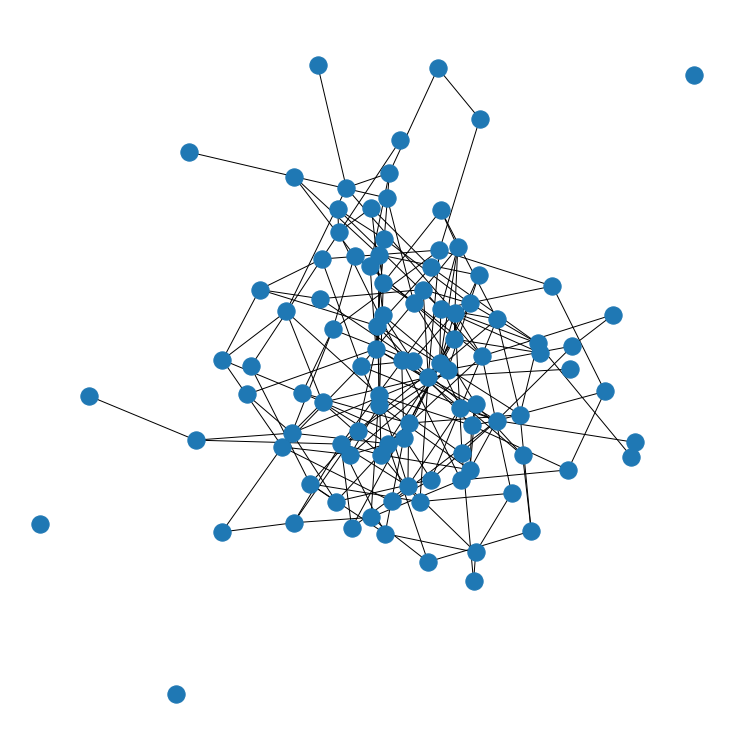

In [11]:
n = 100  # 100 nodes
m = 200  # 20 edges
seed = 1000  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos=pos)

plt.show()

In [12]:
Adj_mat = nx.convert_matrix.to_numpy_array(G)
Adj_lst = Adj_list(Adj_mat)
print ('Part of adjacency list: ')


Part of adjacency matrix: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Part of adjacency list: 
[[11, 41, 64, 83, 89], [6, 11, 28, 39], [25, 30, 40, 79], [4, 37, 38, 45, 54], [3, 58, 69, 82], [6, 53, 86], [1, 5, 20, 81], [33, 62, 86], [45, 49, 96], [11, 12, 29, 30, 68, 96], [62], [0, 1, 9, 96], [9, 50, 62], [32, 37, 43, 93], [51], [16, 37, 69, 70, 97], [15, 28, 31, 33, 47, 97, 99], [26, 55, 70, 77], [22, 25, 37, 57, 59, 96], [62, 79, 83, 88, 98]]


In [19]:
print ('Part of adjacency matrix: ')
print (Adj_mat[0:15, 0:15])

Part of adjacency matrix: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [51]:
visited = [False for i in range(101)]
all_components = []
graph = Adj_lst
def dfs(node, component):
    visited[node] = True
    component.append(node)
    for neighbour in graph[node]:
        if visited[neighbour] == False:
            dfs(neighbour, component)


for i in range(100):
    if visited[i] == False:
        component = []
        dfs(i, component)
        all_components.append(component)

str = 1
for line in all_components:
    print (str, ' component: ', line)
    str +=1

1  component:  [0, 11, 1, 6, 5, 53, 49, 8, 45, 3, 4, 58, 23, 27, 28, 16, 15, 37, 13, 32, 40, 2, 25, 18, 22, 69, 66, 50, 12, 9, 29, 43, 44, 24, 31, 90, 21, 33, 7, 62, 10, 19, 79, 83, 91, 35, 76, 39, 59, 48, 88, 64, 42, 56, 89, 61, 87, 85, 20, 36, 54, 97, 68, 55, 17, 26, 34, 78, 52, 67, 80, 46, 81, 63, 60, 86, 95, 77, 30, 57, 94, 74, 82, 47, 70, 99, 98, 51, 14, 41, 84, 75, 71, 92, 96, 93, 38]
2  component:  [65]
3  component:  [72]
4  component:  [73]


In [52]:
print(list(nx.connected_components(G)))
print(nx.number_connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}, {65}, {72}, {73}]
4


BFS


In [57]:
def bfs(graph, start, end):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node == end:
            return path
        for adjacent in graph[node]:
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)

print (bfs(graph, 55, 62))
print(nx.shortest_path(G, source=55, target=62))


[55, 81, 46, 62]
[55, 81, 46, 62]
